In [163]:
# alg. 9.2 B&F with slight modification
using LinearAlgebra
using Plots

In [164]:
function sympower(A, x, tol=1e-2, maxit=1000)
    # store intermediate vectors
    all_x = zeros(length(x), maxit+1);
    all_x[:, 1] = x;
    # store all errors
    all_err = zeros(maxit+1);
    k = 1;
    x = x / norm(x);
    while k < maxit 
        y = A*x
        mu = transpose(x)*y
        if norm(y) == 0
            return 0, x, all_err
        else
            # save old vec
            all_x[:, k] = x;
            err = norm(x - (y/norm(y)), Inf);
            # save err
            all_err[k] = err;
            x = y / norm(y);
            # println(x)
            if err <= tol
               return mu, x, all_err
            end
        k = k + 1
        end
    end
end

sympower (generic function with 4 methods)

In [165]:
A = [2 1 1; 1 2 1; 1 1 2];
A

3×3 Array{Int64,2}:
 2  1  1
 1  2  1
 1  1  2

## True eigenvalues and eigenvectors

In [166]:
eigvals(A)

3-element Array{Float64,1}:
 0.999999999999999
 1.0
 3.999999999999999

In [167]:
eigvecs(A)

3×3 Array{Float64,2}:
 -0.0698557   0.813503  -0.57735
 -0.669586   -0.467248  -0.57735
  0.739442   -0.346255  -0.57735

## Our approximation

In [168]:
x0 = [1; -1; 2]

3-element Array{Int64,1}:
  1
 -1
  2

In [169]:
final_lambda, final_vec, errors = sympower(A, x0);
final_lambda

3.9998397912709134

In [170]:
final_vec

3-element Array{Float64,1}:
 0.5776312144754642
 0.5759397614316122
 0.5784769409973901

## Error Plot

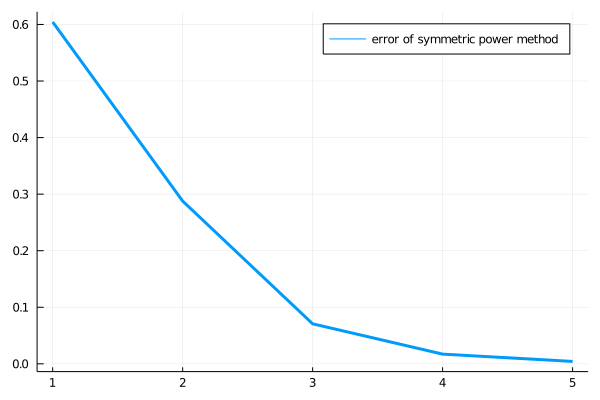

In [183]:
plot(errors[1:5], label="error of symmetric power method", lw = 3, fmt=:png)